In [2]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

In [ ]:
import sys
print(sys.version)

: 

In [3]:
train_labels = []
train_samples = []

In [4]:
for i in range(50):
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(1)

    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(0)

for i in range(1000):
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(0)

    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(1)

In [5]:
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)
train_labels, train_samples = shuffle(train_labels,train_samples)

In [6]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1,1))


In [7]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy


2023-11-05 16:21:07.200051: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-05 16:21:07.375875: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:

physical_devices = tf.config.list_physical_devices('GPU')
print("Num GPUs Available: ", len(physical_devices))
# if len(physical_devices) > 0:
#     tf.config.experimental.set_memory_growth(physical_devices[0],True)

Num GPUs Available:  1


2023-11-05 16:21:09.532416: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-05 16:21:09.550629: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-05 16:21:09.550762: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.


In [9]:
model = Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation="softmax")
])

2023-11-05 16:21:09.613529: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-05 16:21:09.613766: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-05 16:21:09.613969: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-05 16:21:10.469342: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-05 16:21:10.469522: I tensorflow/compile

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642 (2.51 KB)
Trainable params: 642 (2.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [12]:
model.fit(x=scaled_train_samples, y=train_labels, validation_split=0.1, batch_size=10, epochs=100, shuffle=True, verbose=2)

Epoch 1/100


2023-11-05 16:21:12.776849: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:606] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-11-05 16:21:12.789464: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7fb300b5d510 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-11-05 16:21:12.789514: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3070, Compute Capability 8.6
2023-11-05 16:21:12.814523: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-11-05 16:21:13.001035: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8600
2023-11-05 16:21:13.154148: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the p

189/189 - 3s - loss: 0.6572 - accuracy: 0.5302 - val_loss: 0.6291 - val_accuracy: 0.6667 - 3s/epoch - 14ms/step
Epoch 2/100
189/189 - 0s - loss: 0.6314 - accuracy: 0.6444 - val_loss: 0.5975 - val_accuracy: 0.7714 - 438ms/epoch - 2ms/step
Epoch 3/100
189/189 - 0s - loss: 0.5995 - accuracy: 0.7280 - val_loss: 0.5637 - val_accuracy: 0.8095 - 485ms/epoch - 3ms/step
Epoch 4/100
189/189 - 1s - loss: 0.5677 - accuracy: 0.7794 - val_loss: 0.5325 - val_accuracy: 0.8333 - 501ms/epoch - 3ms/step
Epoch 5/100
189/189 - 0s - loss: 0.5372 - accuracy: 0.8063 - val_loss: 0.5031 - val_accuracy: 0.8524 - 460ms/epoch - 2ms/step
Epoch 6/100
189/189 - 0s - loss: 0.5080 - accuracy: 0.8339 - val_loss: 0.4753 - val_accuracy: 0.8619 - 441ms/epoch - 2ms/step
Epoch 7/100
189/189 - 0s - loss: 0.4797 - accuracy: 0.8513 - val_loss: 0.4480 - val_accuracy: 0.8762 - 462ms/epoch - 2ms/step
Epoch 8/100
189/189 - 0s - loss: 0.4526 - accuracy: 0.8651 - val_loss: 0.4228 - val_accuracy: 0.9000 - 490ms/epoch - 3ms/step
Epoch 

In [13]:
test_labels = []
test_samples = []

In [14]:
for i in range(50):
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(1)

    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(0)

for i in range(1000):
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(0)

    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(1)

In [15]:
test_labels = np.array(test_labels)
test_samples = np.array(test_samples)
test_labels, test_samples = shuffle(test_labels,test_samples)

In [16]:
scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1,1))

In [17]:
predictions = model.predict(x=scaled_test_samples, batch_size=10, verbose=0)

In [18]:
predictions = model.predict(x=scaled_test_samples, batch_size=10, verbose=0)

In [19]:
for i in predictions:
    print(i)

[0.97230464 0.02769529]
[0.04223821 0.95776176]
[0.0506557  0.94934434]
[0.02434829 0.9756516 ]
[0.3219245  0.67807555]
[0.06630473 0.9336953 ]
[0.96740013 0.03259988]
[0.67511404 0.3248859 ]
[0.09416737 0.90583265]
[0.95759535 0.04240464]
[0.01678935 0.9832107 ]
[0.08634849 0.91365147]
[0.10261472 0.8973853 ]
[0.01678935 0.9832107 ]
[0.97098947 0.02901057]
[0.967979   0.03202096]
[0.97201455 0.02798543]
[0.9270938  0.07290617]
[0.77268314 0.22731686]
[0.9668111  0.03318887]
[0.97150654 0.02849352]
[0.93452036 0.06547967]
[0.08634849 0.91365147]
[0.9696567 0.0303433]
[0.06064444 0.9393556 ]
[0.02670633 0.97329366]
[0.07912211 0.9208779 ]
[0.22494823 0.7750518 ]
[0.96910715 0.03089284]
[0.13208213 0.86791784]
[0.06064444 0.9393556 ]
[0.97230464 0.02769529]
[0.97251385 0.02748615]
[0.97230464 0.02769529]
[0.968548   0.03145202]
[0.03210637 0.9678936 ]
[0.37780294 0.6221971 ]
[0.9688288  0.03117121]
[0.9707051 0.0292949]
[0.06064444 0.9393556 ]
[0.9654288  0.03457119]
[0.87351453 0.126485

In [20]:
rounded_predictions = np.argmax(predictions, axis=-1)

In [21]:
for i in rounded_predictions:
    print(i)

0
1
1
1
1
1
0
0
1
0
1
1
1
1
0
0
0
0
0
0
0
0
1
0
1
1
1
1
0
1
1
0
0
0
0
1
1
0
0
1
0
0
0
0
1
0
1
0
1
0
0
1
0
1
1
1
0
1
1
0
0
0
1
0
1
0
0
0
0
1
0
0
1
0
1
0
1
1
1
1
1
0
0
0
1
0
0
0
0
0
1
0
0
0
1
0
1
0
0
0
0
1
1
0
0
1
0
0
1
1
1
0
0
0
1
0
0
0
0
1
0
1
1
1
1
1
1
0
1
1
1
1
1
0
0
0
0
0
0
0
0
0
1
1
0
0
1
1
1
1
0
1
0
1
0
0
1
1
1
1
1
1
1
1
0
0
1
0
0
0
0
0
0
1
1
1
0
1
1
0
0
0
0
1
1
1
0
0
0
0
0
1
1
1
0
0
1
1
1
0
0
1
1
1
0
0
1
0
0
0
0
0
0
0
1
1
1
1
0
0
0
0
0
1
1
0
0
0
0
0
0
1
1
0
1
1
0
1
1
1
0
1
0
0
1
0
1
1
0
0
1
0
1
1
0
0
1
1
0
0
1
0
1
0
0
0
1
1
1
0
1
1
1
1
1
0
0
1
1
1
0
0
0
0
1
1
1
1
1
0
1
0
0
1
1
0
1
0
1
1
0
0
1
1
1
1
0
0
1
1
0
1
0
0
0
0
1
1
0
0
1
1
1
0
1
1
1
1
1
1
1
0
1
1
0
1
1
1
1
1
1
0
0
1
0
1
1
0
0
1
1
1
1
1
0
0
1
0
1
1
0
0
0
1
0
0
1
1
0
0
1
1
0
0
1
0
0
1
1
0
1
0
0
1
0
0
0
1
1
0
0
1
0
0
0
0
1
1
0
0
0
0
1
1
0
0
0
0
1
0
0
0
0
1
1
0
1
0
0
0
0
0
0
0
1
1
1
1
1
0
0
0
0
0
1
1
0
1
1
0
0
1
1
1
1
1
0
1
0
0
0
0
1
0
0
1
1
1
0
1
0
0
0
1
1
1
1
0
0
1
0
1
1
0
1
0
1
1
0
0
0
0
0
1
0
1
0
0
1
1
1
0
1
0
1
0
0
0
1
0


In [22]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [23]:
cm = confusion_matrix(y_true=test_labels, y_pred=rounded_predictions)

In [24]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


Confusion matrix, without normalization
[[ 980   70]
 [  50 1000]]


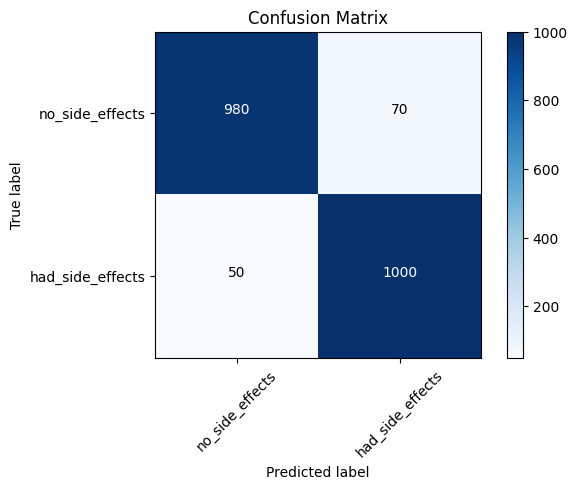

In [62]:
cm_plot_labels = ['no_side_effects','had_side_effects']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')


In [26]:
#2023 updated version
from sklearn import datasets, svm
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

In [67]:


# Split the data into a training set and a test set


# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results

def visualize_output(x, y, predictions, prediction_labels, confusion_matrix_plot_labels,cmap=plt.cm.Blues):
    classifier = svm.SVC(kernel="linear", C=0.01).fit(x, y)

    np.set_printoptions(precision=2)

    # Plot non-normalized confusion matrix
    titles_options = [
        ("Confusion matrix, without normalization", None),
        ("Normalized confusion matrix", "true"),
    ]


    for title, normalize in titles_options:
        disp = ConfusionMatrixDisplay.from_estimator(
            classifier,
            np.array(predictions).reshape(-1,1),
            np.array(prediction_labels).reshape(-1,1),
            display_labels=confusion_matrix_plot_labels,
            cmap=cmap,
            normalize=normalize,
        )
        disp.ax_.set_title(title)

        print(title)
        print(disp.confusion_matrix)

    plt.show()
visualize_output(scaled_train_samples, train_labels, rounded_predictions, test_labels, cm_plot_labels)


TypeError: from_estimator() missing 1 required positional argument: 'y'

In [28]:
import os.path
filepath = 'model/medical_trial_model.keras' 
if os.path.isfile(filepath) is False:
    model.save(filepath)

In [29]:
from keras.models import load_model
new_model = load_model(filepath)

In [30]:
new_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 16)                32        
                                                                 
 dense_7 (Dense)             (None, 32)                544       
                                                                 
 dense_8 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642 (2.51 KB)
Trainable params: 642 (2.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [31]:
new_model.get_weights()

[array([[ 0.6 ,  0.65, -0.07, -0.19, -0.4 ,  0.01,  0.7 , -0.21, -0.06,
          0.58, -0.3 , -0.49,  0.34, -0.13, -0.08, -0.48]], dtype=float32),
 array([-0.23, -0.21,  0.  ,  0.  ,  0.  ,  0.21, -0.06,  0.  ,  0.  ,
        -0.24,  0.  ,  0.  , -0.16,  0.  ,  0.23,  0.  ], dtype=float32),
 array([[ 0.31, -0.2 ,  0.04,  0.29,  0.45, -0.13, -0.02,  0.07,  0.41,
         -0.65,  0.18, -0.53,  0.26, -0.35, -0.46,  0.31,  0.65, -0.2 ,
         -0.23,  0.54,  0.52,  0.51, -0.16,  0.18,  0.  , -0.54, -0.3 ,
         -0.43,  0.27,  0.66, -0.57, -0.2 ],
        [-0.15,  0.09,  0.22, -0.16,  0.59,  0.17,  0.08,  0.19,  0.33,
         -0.26,  0.56, -0.51,  0.24,  0.03, -0.12, -0.29,  0.27, -0.07,
         -0.54,  0.56,  0.16,  0.52, -0.33,  0.61,  0.03, -0.39, -0.39,
         -0.2 ,  0.29,  0.61, -0.5 ,  0.06],
        [-0.2 , -0.24,  0.34,  0.31,  0.32, -0.26, -0.1 , -0.32, -0.23,
          0.2 ,  0.16,  0.11, -0.31,  0.28,  0.21,  0.12, -0.21,  0.23,
         -0.23, -0.22,  0.19, -0.  , -0.0

In [32]:
new_model.optimizer

In [33]:
json_string = model.to_json()

In [34]:
json_string

'{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"module": "keras.layers", "class_name": "InputLayer", "config": {"batch_input_shape": [null, 1], "dtype": "float32", "sparse": false, "ragged": false, "name": "dense_input"}, "registered_name": null}, {"module": "keras.layers", "class_name": "Dense", "config": {"name": "dense", "trainable": true, "dtype": "float32", "batch_input_shape": [null, 1], "units": 16, "activation": "relu", "use_bias": true, "kernel_initializer": {"module": "keras.initializers", "class_name": "GlorotUniform", "config": {"seed": null}, "registered_name": null}, "bias_initializer": {"module": "keras.initializers", "class_name": "Zeros", "config": {}, "registered_name": null}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}, "registered_name": null, "build_config": {"input_shape": [null, 1]}}, {"module": "keras.layers", "class_name": "Dense", "config": {

In [35]:
from keras.models import model_from_json
model_architecture = model_from_json(json_string)

In [36]:
model_architecture.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642 (2.51 KB)
Trainable params: 642 (2.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [37]:
weightsFilepath = 'model/medical_trial_weights.keras' 
if os.path.isfile(weightsFilepath) is False:
    model.save_weights(weightsFilepath)

In [38]:
model2 = Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation="softmax")
])

In [39]:
model2.load_weights(weightsFilepath)

In [40]:
model2.get_weights()

[array([[ 0.6 ,  0.65, -0.07, -0.19, -0.4 ,  0.01,  0.7 , -0.21, -0.06,
          0.58, -0.3 , -0.49,  0.34, -0.13, -0.08, -0.48]], dtype=float32),
 array([-0.23, -0.21,  0.  ,  0.  ,  0.  ,  0.21, -0.06,  0.  ,  0.  ,
        -0.24,  0.  ,  0.  , -0.16,  0.  ,  0.23,  0.  ], dtype=float32),
 array([[ 0.31, -0.2 ,  0.04,  0.29,  0.45, -0.13, -0.02,  0.07,  0.41,
         -0.65,  0.18, -0.53,  0.26, -0.35, -0.46,  0.31,  0.65, -0.2 ,
         -0.23,  0.54,  0.52,  0.51, -0.16,  0.18,  0.  , -0.54, -0.3 ,
         -0.43,  0.27,  0.66, -0.57, -0.2 ],
        [-0.15,  0.09,  0.22, -0.16,  0.59,  0.17,  0.08,  0.19,  0.33,
         -0.26,  0.56, -0.51,  0.24,  0.03, -0.12, -0.29,  0.27, -0.07,
         -0.54,  0.56,  0.16,  0.52, -0.33,  0.61,  0.03, -0.39, -0.39,
         -0.2 ,  0.29,  0.61, -0.5 ,  0.06],
        [-0.2 , -0.24,  0.34,  0.31,  0.32, -0.26, -0.1 , -0.32, -0.23,
          0.2 ,  0.16,  0.11, -0.31,  0.28,  0.21,  0.12, -0.21,  0.23,
         -0.23, -0.22,  0.19, -0.  , -0.0

In [41]:
import numpy as np
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
import PIL
import PIL.Image
import tensorflow_datasets as tfds
import pathlib 
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [157]:
os.chdir('assets')
if os.path.isdir('train/dog') is False:
    os.makedirs('train/dog')
    os.makedirs('train/cat')
    os.makedirs('valid/dog')
    os.makedirs('valid/cat')
    os.makedirs('test/dog')
    os.makedirs('test/cat')

    print( os.getcwd())

    cats_src = './origin/cat*'
    dogs_src = './origin/dog*'
    print(len(glob.glob(cats_src)),len(glob.glob(dogs_src)))
    for i in random.sample(glob.glob(cats_src), 5000):
        shutil.move(i, 'train/cat')      
    for i in random.sample(glob.glob(dogs_src), 5000):
        shutil.move(i, 'train/dog')
    for i in random.sample(glob.glob(cats_src), 1000):
        shutil.move(i, 'valid/cat')        
    for i in random.sample(glob.glob(dogs_src), 1000):
        shutil.move(i, 'valid/dog')
    for i in random.sample(glob.glob(cats_src), 250):
        shutil.move(i, 'test/cat')      
    for i in random.sample(glob.glob(dogs_src), 250):
        shutil.move(i, 'test/dog')
os.chdir('../')
print( os.getcwd())

/tf/assets
12500 12500
/tf


In [155]:
os.chdir('assets')
print(glob.glob('./origin/cat*'))
print( os.getcwd())
os.chdir('../')
print( os.getcwd())

['./origin/cat.0.jpg', './origin/cat.1.jpg', './origin/cat.10.jpg', './origin/cat.100.jpg', './origin/cat.1000.jpg', './origin/cat.10000.jpg', './origin/cat.10001.jpg', './origin/cat.10002.jpg', './origin/cat.10003.jpg', './origin/cat.10004.jpg', './origin/cat.10005.jpg', './origin/cat.10006.jpg', './origin/cat.10007.jpg', './origin/cat.10008.jpg', './origin/cat.10009.jpg', './origin/cat.1001.jpg', './origin/cat.10010.jpg', './origin/cat.10011.jpg', './origin/cat.10012.jpg', './origin/cat.10013.jpg', './origin/cat.10014.jpg', './origin/cat.10015.jpg', './origin/cat.10016.jpg', './origin/cat.10017.jpg', './origin/cat.10018.jpg', './origin/cat.10019.jpg', './origin/cat.1002.jpg', './origin/cat.10020.jpg', './origin/cat.10021.jpg', './origin/cat.10022.jpg', './origin/cat.10023.jpg', './origin/cat.10024.jpg', './origin/cat.10025.jpg', './origin/cat.10026.jpg', './origin/cat.10027.jpg', './origin/cat.10028.jpg', './origin/cat.10029.jpg', './origin/cat.1003.jpg', './origin/cat.10030.jpg', '.

/tf


In [42]:
train_path = "assets/train"
valid_path = "assets/valid"
test_path = "assets/test"

train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=train_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10)
print(train_batches)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=valid_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=test_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10, shuffle=False)

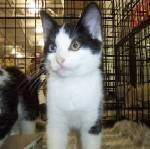

In [43]:


cats = list(pathlib.Path(train_path).glob('*/*.jpg'))
firstImage = PIL.Image.open(str(cats[0])).show()




In [44]:
# train_dir =  pathlib.Path(train_path).glob('*/*.jpg')
# print(train_dir)
# valid_dir = pathlib.Path(valid_path).glob('*/*.jpg')
# print(len(list(valid_dir)))
# test_dir = pathlib.Path(test_path).glob('*/*.jpg')
# print(len(list(test_dir)))

batch_size = 50
img_height = 224
img_width = 224

In [45]:

train_ds = tf.keras.utils.image_dataset_from_directory(
    train_path,
    # validation_split=0.2,
    # subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size,
)

Found 1000 files belonging to 2 classes.


In [46]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  valid_path,
#   validation_split=0.2,
#   subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size),

Found 200 files belonging to 2 classes.


In [47]:
class_names = train_ds.class_names
print(class_names)

['cat', 'dog']


tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)


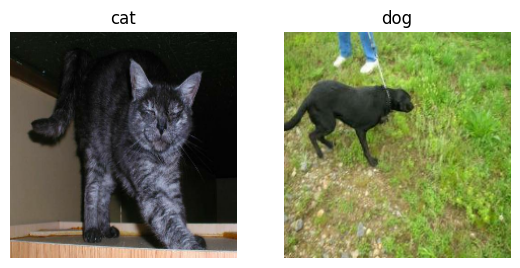

In [48]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(len(class_names)):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    print(labels[i])
    plt.axis("off")

In [49]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(50, 224, 224, 3)
(50,)


In [50]:
normalization_layer = tf.keras.layers.Rescaling(1./255)


In [51]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [ ]:
num_classes = 2

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [52]:
num_classes = 2

vision_model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding= 'same'),
  tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=2),
  tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding= 'same'),
  tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(num_classes, activation='softmax')
])

model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [53]:
vision_model.compile(
  optimizer=Adam(learning_rate=0.0001),
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy']
)

In [54]:
vision_train_history = vision_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=30,
  verbose=2
)

Epoch 1/30


/usr/local/lib/python3.8/dist-packages/keras/src/backend.py:5714: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


20/20 - 5s - loss: 0.7255 - accuracy: 0.5270 - val_loss: 0.6879 - val_accuracy: 0.4900 - 5s/epoch - 259ms/step
Epoch 2/30
20/20 - 1s - loss: 0.6619 - accuracy: 0.6040 - val_loss: 0.6895 - val_accuracy: 0.5800 - 1s/epoch - 66ms/step
Epoch 3/30
20/20 - 1s - loss: 0.6398 - accuracy: 0.6290 - val_loss: 0.6780 - val_accuracy: 0.5650 - 1s/epoch - 64ms/step
Epoch 4/30
20/20 - 1s - loss: 0.6178 - accuracy: 0.6680 - val_loss: 0.6706 - val_accuracy: 0.5550 - 1s/epoch - 63ms/step
Epoch 5/30
20/20 - 1s - loss: 0.5986 - accuracy: 0.6950 - val_loss: 0.7344 - val_accuracy: 0.5050 - 1s/epoch - 62ms/step
Epoch 6/30
20/20 - 1s - loss: 0.5668 - accuracy: 0.7150 - val_loss: 0.6574 - val_accuracy: 0.5850 - 1s/epoch - 61ms/step
Epoch 7/30
20/20 - 1s - loss: 0.5398 - accuracy: 0.7440 - val_loss: 0.6780 - val_accuracy: 0.5900 - 1s/epoch - 61ms/step
Epoch 8/30
20/20 - 1s - loss: 0.5067 - accuracy: 0.7810 - val_loss: 0.6476 - val_accuracy: 0.6150 - 1s/epoch - 61ms/step
Epoch 9/30
20/20 - 1s - loss: 0.4895 - acc

[0.5270000100135803, 0.6039999723434448, 0.6290000081062317, 0.6679999828338623, 0.6949999928474426, 0.7149999737739563, 0.7440000176429749, 0.781000018119812, 0.7829999923706055, 0.8090000152587891, 0.8510000109672546, 0.8629999756813049, 0.859000027179718, 0.8830000162124634, 0.9010000228881836, 0.9079999923706055, 0.921999990940094, 0.9459999799728394, 0.9210000038146973, 0.9419999718666077, 0.9419999718666077, 0.9570000171661377, 0.9570000171661377, 0.9670000076293945, 0.9629999995231628, 0.972000002861023, 0.9710000157356262, 0.984000027179718, 0.968999981880188, 0.9810000061988831]


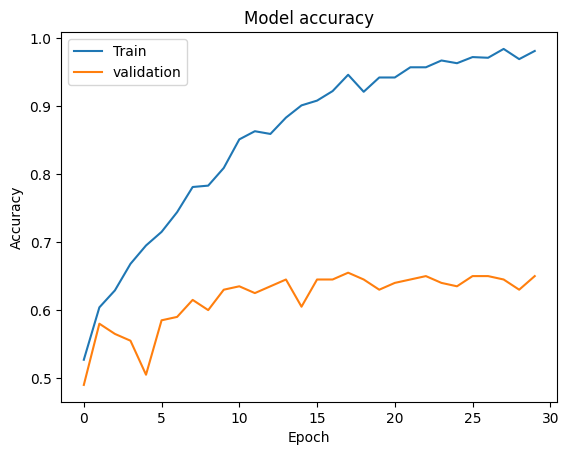

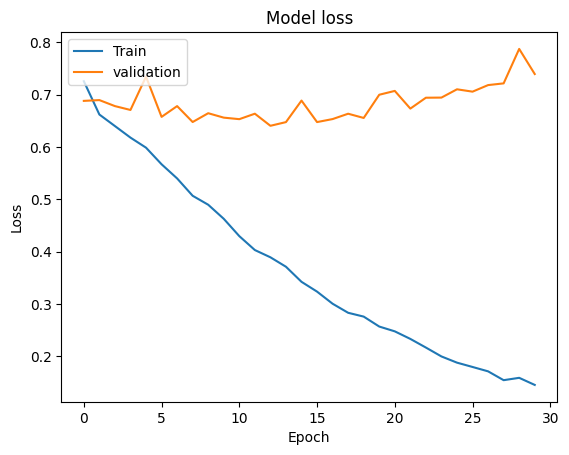

In [122]:
print(vision_train_history.history['accuracy'])

plt.plot(vision_train_history.history['accuracy'])
plt.plot(vision_train_history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'validation'], loc='upper left')
plt.show()

# 绘制训练 & 验证的损失值
plt.plot(vision_train_history.history['loss'])
plt.plot(vision_train_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'validation'], loc='upper left')
plt.show()

In [56]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

vision_test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=test_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10, shuffle=False)
vision_test_imgs, vision_test_labels = next(vision_test_batches)
plotImages(vision_test_imgs)
print(vision_test_labels)

vision_test_batches.classes

In [160]:

test_ds = tf.keras.utils.image_dataset_from_directory(
    test_path,
    # validation_split=0.2,
    # subset="training",
    image_size=(img_height, img_width),
    batch_size=batch_size,
    labels='inferred',
    label_mode='categorical',
    shuffle=False
)

Found 500 files belonging to 2 classes.


In [161]:
vision_predictions = vision_model.predict(x=test_ds, verbose=0)

In [162]:

vision_rounded_predictions = np.argmax(vision_predictions, axis=-1)
print(vision_rounded_predictions)

[0 0 0 0 0 1 1 0 0 1 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1
 0 1 0 0 0 1 0 0 1 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 0 1 0 1 0 0 0 0 1 0 1 0
 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 1 0 1 0 0 0 0 0
 0 0 0 0 0 0 1 1 1 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0
 0 1 0 0 1 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 1 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0
 1 1 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 1 1 1 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0 1 1 1 0 1 1
 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0
 1 1 1 0 0 0 1 1 0 1 0 1 0 1 0 1 0 1 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1 1 0
 0 0 0 1 1 1 1 1 1 0 1 1 0 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 0 1 0
 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 1 1 1 1 0 0 1 1 1 1 0
 1 1 0 0 1 0 1 1 1 1 0 0 0 1 1 0 1 1 1 0 1 1 1 1 0 1 0 0 0 1 1 1 1 0 1 0 0
 1 1 0 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0
 0 0 1 1 0 1 1 1 1 1 1 0 

Confusion matrix, without normalization
[[175  75]
 [ 84 166]]


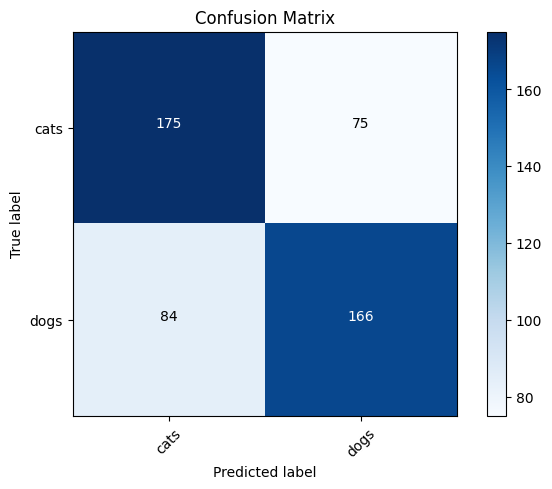

In [163]:
vision_predictions_cm = np.array([])
vision_test_labels =  np.array([])
for x, y in test_ds:

  vision_predictions_cm = np.argmax(vision_predictions,axis=1)
  vision_test_labels = np.concatenate([vision_test_labels, np.argmax(y.numpy(), axis=-1)])

vision_cm = tf.math.confusion_matrix(labels=vision_test_labels, predictions=vision_predictions_cm).numpy()
vision_cm_plot_labels= ['cats','dogs']
plot_confusion_matrix(cm=vision_cm, classes=vision_cm_plot_labels, title='Confusion Matrix')
